<a href="https://colab.research.google.com/github/Evgen-Shah/Opencv_imageDetect/blob/main/DetectAirCond.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подключим необходимые библиотеки

In [ ]:
import cv2
from PIL import Image
import numpy as np
import requests
from google.colab.patches import cv2_imshow
import inspect
import math
from math import sqrt
import imutils
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files
from PIL import Image
from io import BytesIO
from IPython.display import display

Mounted at /content/drive


# Используем метод findContours для поиска кондиционеров

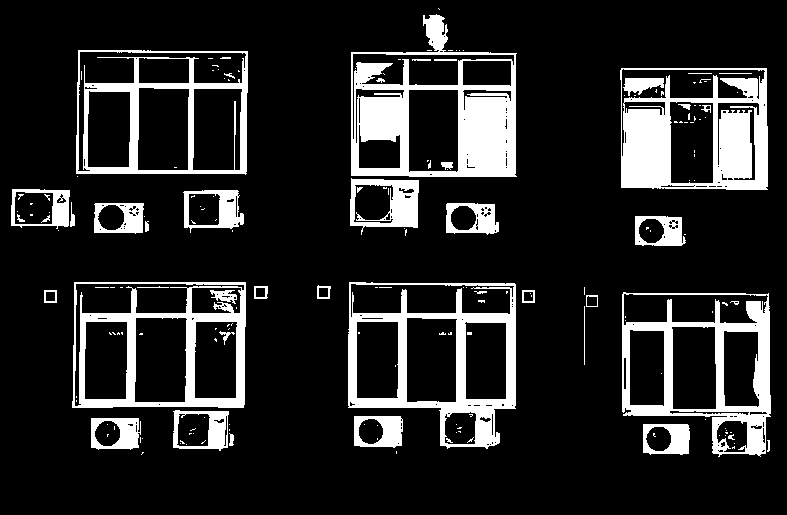

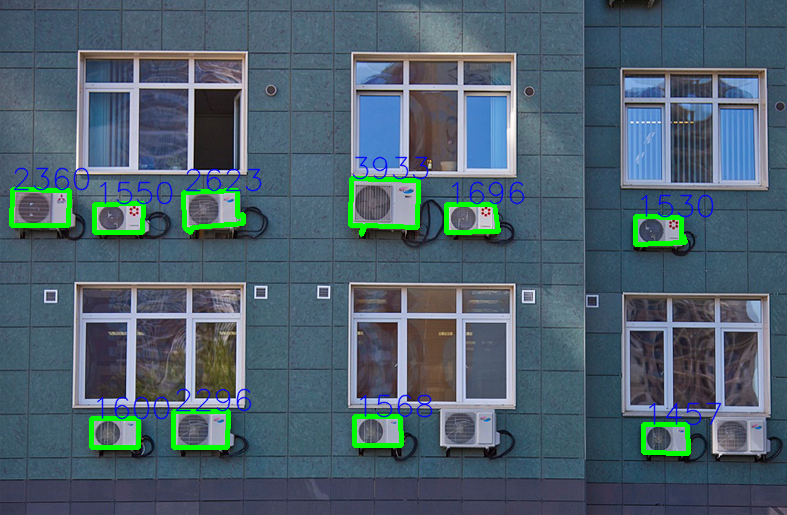

Количество кондиционеров: 10


In [ ]:
path="/content/drive/MyDrive/CondImages"
image = Image.open(path+'/2.jpg')
image = np.array(image)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
gaussian_3 = cv2.GaussianBlur(image, (0, 0), 2.0)
unsharp_image = cv2.addWeighted(image, 2.0, gaussian_3, -1.0, 0)
pyr_mean = cv2.pyrMeanShiftFiltering(unsharp_image,30,50)
img_grey = cv2.cvtColor(pyr_mean,cv2.COLOR_BGR2GRAY)
thresh = 120
ret,thresh_img = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh_img)
contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img_contours = np.zeros(image.shape)
total = 0
for cont in contours:
        area = cv2.contourArea(cont)
        x,y,w,h = cv2.boundingRect(cont)
        area = w*h
        extent = float(area)/area
        sm = cv2.arcLength(cont, True)
        apd = cv2.approxPolyDP(cont, 0.02*sm, True)
        if(area < 8000 and area > 1000 and extent > 0.4):
          cv2.drawContours(image, [apd], -1, (0,255,0), 3)
          cv2.putText(image, str(area), (x, y),cv2.FONT_HERSHEY_SIMPLEX,1, (255, 0, 0), 1,cv2.LINE_AA)
          total += 1
cv2_imshow(image)
print('Количество кондиционеров: ' + str(total))

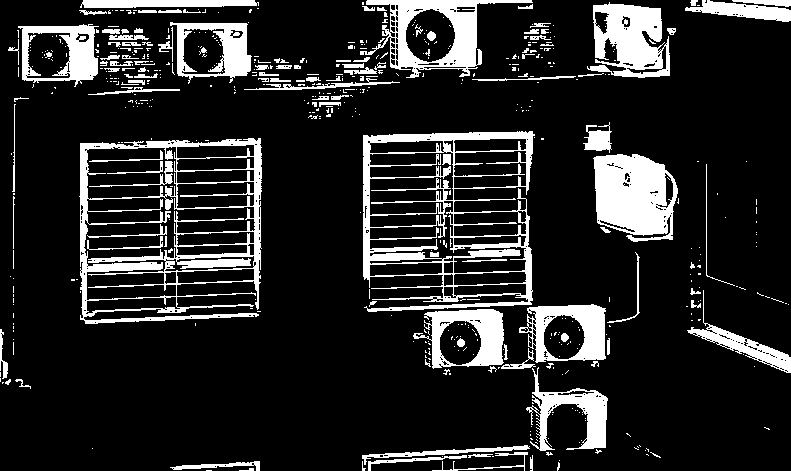

440


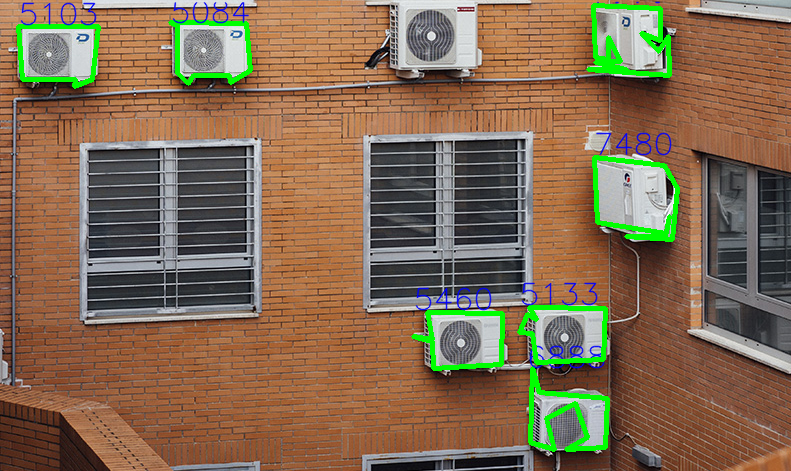

7


In [ ]:
path="/content/drive/MyDrive/CondImages"
image = Image.open(path+'/5.jpg')
image = np.array(image)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
gaussian_3 = cv2.GaussianBlur(image, (0, 0), 2.0)
unsharp_image = cv2.addWeighted(image, 2.0, gaussian_3, -1.0, 0)
pyrMean = cv2.pyrMeanShiftFiltering(unsharp_image,20,50)# 20 50
img_grey = cv2.cvtColor(pyrMean,cv2.COLOR_BGR2GRAY)
thresh = 160
ret,thresh_img = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh_img)
contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))
img_contours = np.zeros(image.shape)
total = 0
for cont in contours:
        area = cv2.contourArea(cont)
        x,y,w,h = cv2.boundingRect(cont)
        rect_area = w*h
        extent = float(area)/rect_area
        sm = cv2.arcLength(cont, True)
        apd = cv2.approxPolyDP(cont, 0.02*sm, True)
        if(rect_area < 8000 and rect_area > 4800):
          cv2.drawContours(image, [apd], -1, (0,255,0), 3)
          cv2.putText(image, str(rect_area), (x, y),cv2.FONT_HERSHEY_SIMPLEX,1, (255, 0, 0), 1,cv2.LINE_AA)
          total += 1
cv2_imshow(image)
print(total)

Из-за слияния контуров кондиционера и внешнего подоконника, некоторые кондиционеры были не определены

# Используем matchTemplate для определения

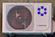

Количество кондиционеров: 13


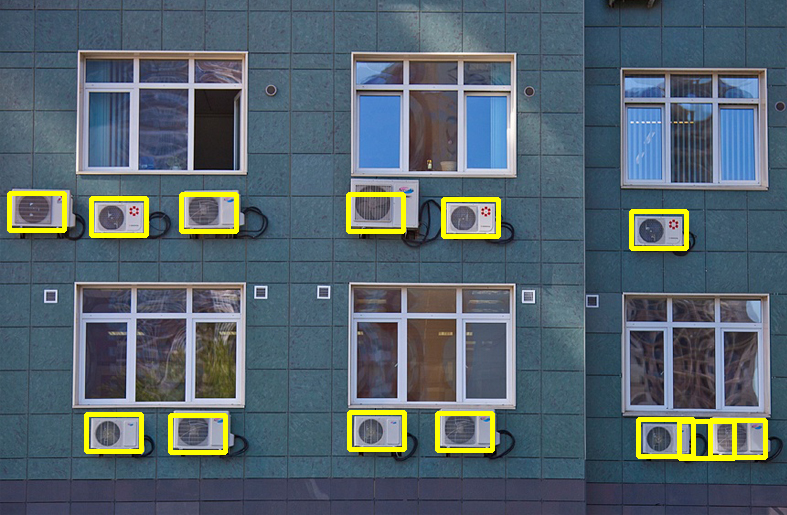

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

path="/content/drive/MyDrive/CondImages"
ref = Image.open(path+'/2.jpg')
ref = np.array(ref)
ref = cv2.cvtColor(ref,cv2.COLOR_BGR2RGB)
hR = ref.shape[0]
wR = ref.shape[1]
#cv2_imshow(ref)
copyimg = ref.copy()
total = 0
ref_grey = cv2.cvtColor(ref,cv2.COLOR_BGR2GRAY)
path="/content/drive/MyDrive/CondImages/Match"
template = Image.open(path+'/5.JPG')# 5
template = np.array(template)
cv2_imshow(template)
h = template.shape[0]
w = template.shape[1]
mask = np.zeros((hR+2, wR+2), np.uint8) 
res = cv.matchTemplate(ref,template,cv.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
threshold = 0.5
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    if mask[pt[1] + int(round(h/2)), pt[0] + int(round(w/2))] != 255:
          mask[pt[1]:pt[1]+h, pt[0]:pt[0]+w] = 255
          total += 1
          cv2.rectangle(ref, pt, (pt[0] + w, pt[1] + h), (0,255,255), 3)
print("Количество кондиционеров: " + str(total))
cv2_imshow(ref)

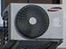

Количество кондиционеров: 8


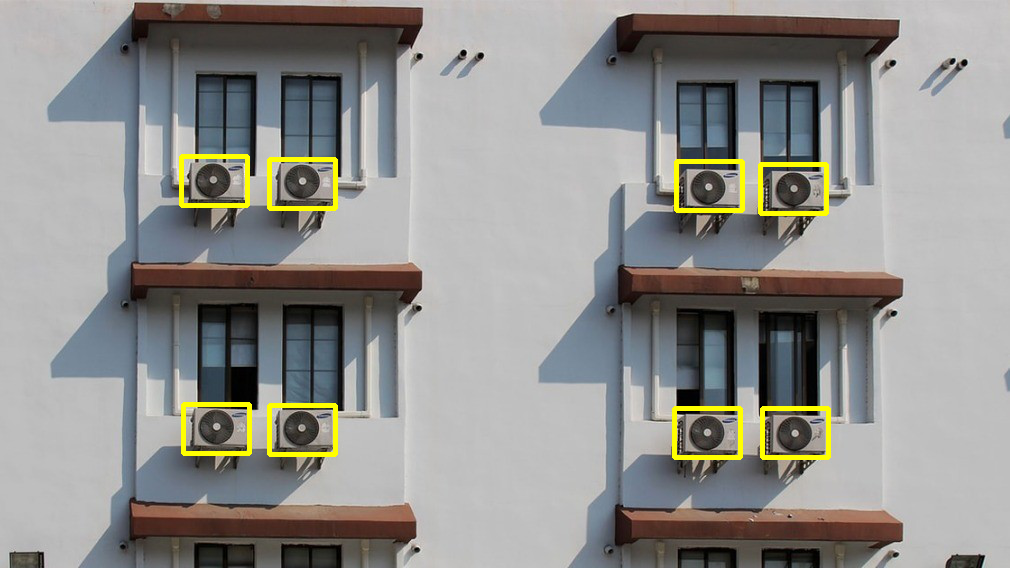

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

path="/content/drive/MyDrive/CondImages"
ref = Image.open(path+'/3.jpg')
ref = np.array(ref)
ref = cv2.cvtColor(ref,cv2.COLOR_BGR2RGB)
hR = ref.shape[0]
wR = ref.shape[1]
#cv2_imshow(ref)
copyimg = ref.copy()
total = 0
ref_grey = cv2.cvtColor(ref,cv2.COLOR_BGR2GRAY)
path="/content/drive/MyDrive/CondImages/Match"
template = Image.open(path+'/new6.JPG')
template = np.array(template)
cv2_imshow(template)
h = template.shape[0]
w = template.shape[1]
mask = np.zeros((hR+2, wR+2), np.uint8) 
res = cv.matchTemplate(ref,template,cv.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
threshold = 0.5
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    if mask[pt[1] + int(round(h/2)), pt[0] + int(round(w/2))] != 255:
          mask[pt[1]:pt[1]+h, pt[0]:pt[0]+w] = 255
          total += 1
          cv2.rectangle(ref, pt, (pt[0] + w, pt[1] + h), (0,255,255), 3)
print("Количество кондиционеров: " + str(total))
cv2_imshow(ref)

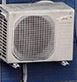

Количество кондиционеров: 8


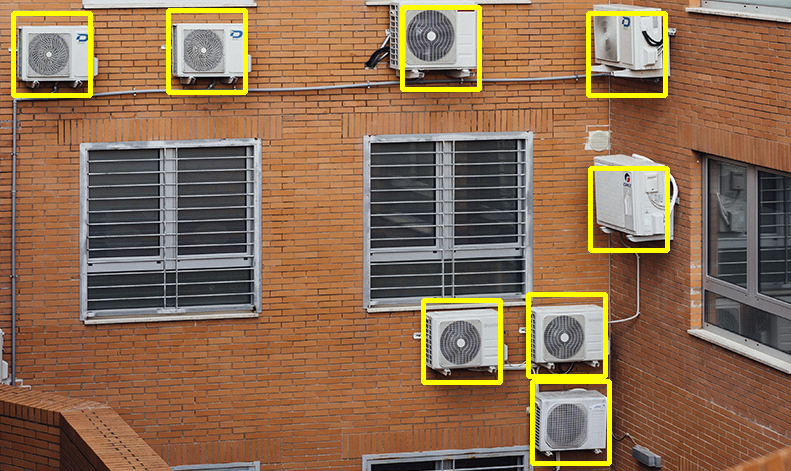

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

path="/content/drive/MyDrive/CondImages"
ref = Image.open(path+'/5.jpg')
ref = np.array(ref)
ref = cv2.cvtColor(ref,cv2.COLOR_BGR2RGB)
hR = ref.shape[0]
wR = ref.shape[1]
#cv2_imshow(ref)
copyimg = ref.copy()
total = 0
ref_grey = cv2.cvtColor(ref,cv2.COLOR_BGR2GRAY)
path="/content/drive/MyDrive/CondImages/Match"
template = Image.open(path+'/new_33333.JPG') # new_33333
template = np.array(template)
cv2_imshow(template)
h = template.shape[0]
w = template.shape[1]
mask = np.zeros((hR+2, wR+2), np.uint8) 
res = cv.matchTemplate(ref,template,cv.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
threshold = 0.5
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
  if mask[pt[1] + int(round(h/2)), pt[0] + int(round(w/2))] != 255:
        mask[pt[1]:pt[1]+h, pt[0]:pt[0]+w] = 255
        total += 1
        cv2.rectangle(ref, pt, (pt[0] + w, pt[1] + h), (0,255,255), 3)
print("Количество кондиционеров: " + str(total))
cv2_imshow(ref)

# Метод matchTemplate показал крайне высокий процент точности на всех изображениях

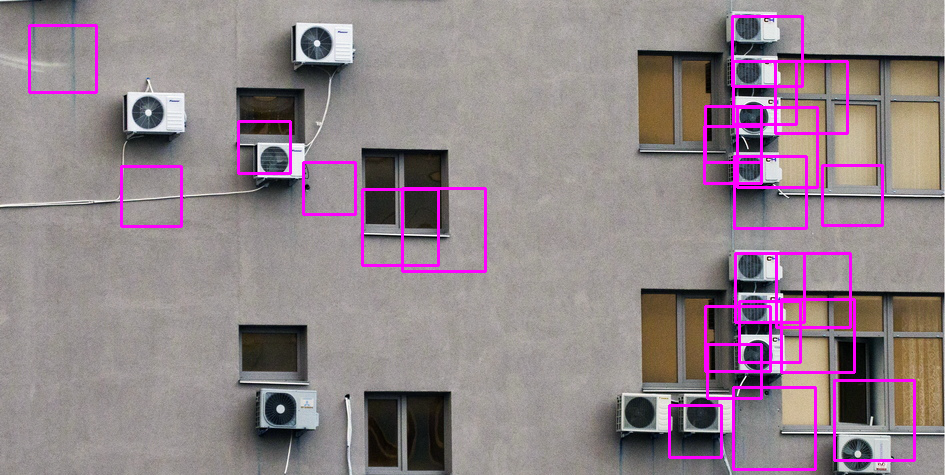

Количество кондиционеров: 23


In [ ]:
path="/content/drive/MyDrive/CondImages"
Cascade = cv2.CascadeClassifier(path + "/cascade.xml")
img = Image.open(path+'/4.jpg','r')
img = np.array(img)
cond = img
count = 0
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) 
faces = Cascade.detectMultiScale(gray,minSize = (40,40), maxSize = (120,120))
for (x,y,w,h) in faces:
  cond = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,255),2)
  count+= 1
cv2_imshow(cond) 
print("Количество кондиционеров: " + str(count))